In [1]:
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.problems import get_problem
from pymoo.optimize import minimize

from utils import *
import pandas as pd
from tqdm import tqdm

In [2]:
dim = 5
problem1 = get_problem(f"bbob-f11-1", n_var=dim)
problem2 = get_problem(f"bbob-f20-1", n_var=dim)

In [3]:
np.linspace(0, 1, num=11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
dfs = []
for alpha in tqdm(np.linspace(0, 1, num=11)):
    mix = CombinedProblem(problem1, problem2, alpha)
    data = run_algorithms(mix, n_runs=10)
    pdf = pd.DataFrame(data)
    pdf['problem1'] = 1 #TODO 
    pdf['problem2'] = 3 #TODO 
    pdf['alpha'] = alpha
    dfs.append(pdf)

100%|██████████| 11/11 [08:29<00:00, 46.32s/it]


In [5]:
df = pd.concat(dfs)
df

,GA,PSO,DE,CMAES,ES,algorithm_run,problem1,problem2,alpha
0,0.703642,2.368767e-01,0.225203,1.697649e+00,0.945616,0,1,3,0.0
1,0.237291,4.737533e-01,0.002737,4.737533e-01,1.347864,1,1,3,0.0
2,0.238280,2.368767e-01,0.478397,1.934525e+00,0.833504,2,1,3,0.0
3,0.022108,7.340873e-09,0.238475,1.658180e+00,0.771547,3,1,3,0.0
4,0.708297,2.408530e-01,0.484179,6.711560e-01,1.078710,4,1,3,0.0
...,...,...,...,...,...,...,...,...,...
5,10.216063,3.126467e+00,21.343135,1.000000e-20,8.673115,5,1,3,1.0
6,10.861371,3.005233e+01,8.266353,4.263256e-14,8.075725,6,1,3,1.0
7,35.303032,3.550398e+01,5.459815,1.421085e-14,5.213328,7,1,3,1.0
8,27.199742,7.110007e+00,10.031266,1.000000e-20,14.338259,8,1,3,1.0


In [6]:
rdf = df[['GA', 'PSO', 'DE', 'CMAES', 'ES']].rank(axis=1)
rdf['problem1'] = df['problem1']
rdf['problem2'] = df['problem2']
rdf['alpha'] = df['alpha']
rdf

,GA,PSO,DE,CMAES,ES,problem1,problem2,alpha
0,3.0,2.0,1.0,5.0,4.0,1,3,0.0
1,2.0,4.0,1.0,3.0,5.0,1,3,0.0
2,2.0,1.0,3.0,5.0,4.0,1,3,0.0
3,2.0,1.0,3.0,5.0,4.0,1,3,0.0
4,4.0,1.0,2.0,3.0,5.0,1,3,0.0
...,...,...,...,...,...,...,...,...
5,4.0,2.0,5.0,1.0,3.0,1,3,1.0
6,4.0,5.0,3.0,1.0,2.0,1,3,1.0
7,4.0,5.0,3.0,1.0,2.0,1,3,1.0
8,5.0,2.0,3.0,1.0,4.0,1,3,1.0


In [7]:
v = rdf.groupby(['alpha']).mean().reset_index().sort_values('alpha')
v

,alpha,GA,PSO,DE,CMAES,ES,problem1,problem2
0,0.0,2.2,2.3,2.1,4.5,3.9,1.0,3.0
1,0.1,3.8,2.5,2.7,3.3,2.7,1.0,3.0
2,0.2,3.9,3.1,3.3,2.5,2.2,1.0,3.0
3,0.3,4.3,3.3,3.2,2.1,2.1,1.0,3.0
4,0.4,3.3,3.4,3.6,2.4,2.3,1.0,3.0
5,0.5,4.0,3.8,3.5,1.4,2.3,1.0,3.0
6,0.6,4.0,3.7,4.1,1.3,1.9,1.0,3.0
7,0.7,4.1,4.1,3.7,1.1,2.0,1.0,3.0
8,0.8,4.2,3.2,3.7,1.1,2.8,1.0,3.0
9,0.9,4.1,3.3,3.9,1.0,2.7,1.0,3.0


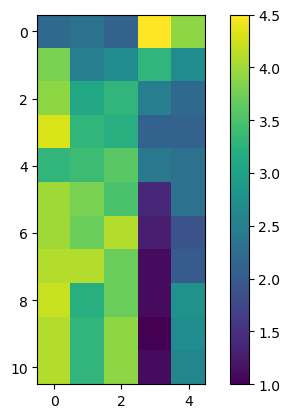

In [8]:
fig = plt.figure()
plt.imshow(v[['GA', 'PSO', 'DE', 'CMAES', 'ES']], cmap='viridis')
plt.colorbar()